# SynthEval user guide
This notebook demonstrates how the included software is used for evaluating synthetic data.

The example is based on the Palmer Archipelago penguin data from kaggle (https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?select=penguins_size.csv), and the synthetic version is generated using DataSynthesizer with default parameters.

The current version of the code requires the following imports;

In [1]:
import pandas as pd

from syntheval import SynthEval

In [2]:
### In this frame we load the dataframes and define some characteristics of them that we will use later.
load_dir = 'example/'
filename = 'penguins'

target_column = 'species'                           # column to use as target for classification metrics and coloration of PCA plot.
categorical_columns = ['species','island','sex']    # Categorical columns can be either supplied or automatically inferred using a number of unique values threshold.

df_real = pd.read_csv(load_dir + filename + '_train.csv')
df_fake = pd.read_csv(load_dir + filename + '_BN_syn.csv').round(1) # be sure to round to an appropriate number of decimals

### Testing data is not required, but the usability analysis will be more complete if it is included. 
df_test = pd.read_csv(load_dir + filename + '_test.csv')

In the first example, we show how little code is required to start evaluating synthetic data. 

SynthEval: inferred categorical columns...
SynthEval: synthetic data read successfully


cls_acc: 100%|██████████| 5/5 [00:00<00:00, 12.35it/s]



SynthEval results

Utility metric description                    value   error                                 
+---------------------------------------------------------------+
| Average dimensionwise means diff. (nums) :   0.0059  0.0078   |
| Average confidence interval overlap      :   0.6825  0.0630   |
|   -> # non-overlapping COIs at 95%       :    0               |
|   -> fraction of non-overlapping CIs     :   0.0000           |
| Mixed correlation matrix difference      :   0.1052           |
| Pairwise mutual information difference   :   0.5585           |
| Kolmogorov–Smirnov test                                       |
|   -> avg. Kolmogorov–Smirnov distance    :   0.0313  0.0033   |
|   -> avg. Kolmogorov–Smirnov p-value     :   0.7852  0.0610   |
|   -> # significant tests at a=0.05       :    0               |
|   -> fraction of significant tests       :   0.0000           |
| Average empirical hellinger distance     :   0.2178  0.0786   |
| Propensity mean squared err

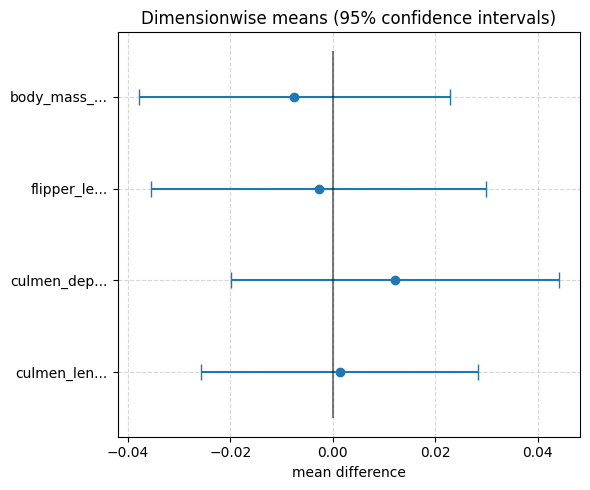

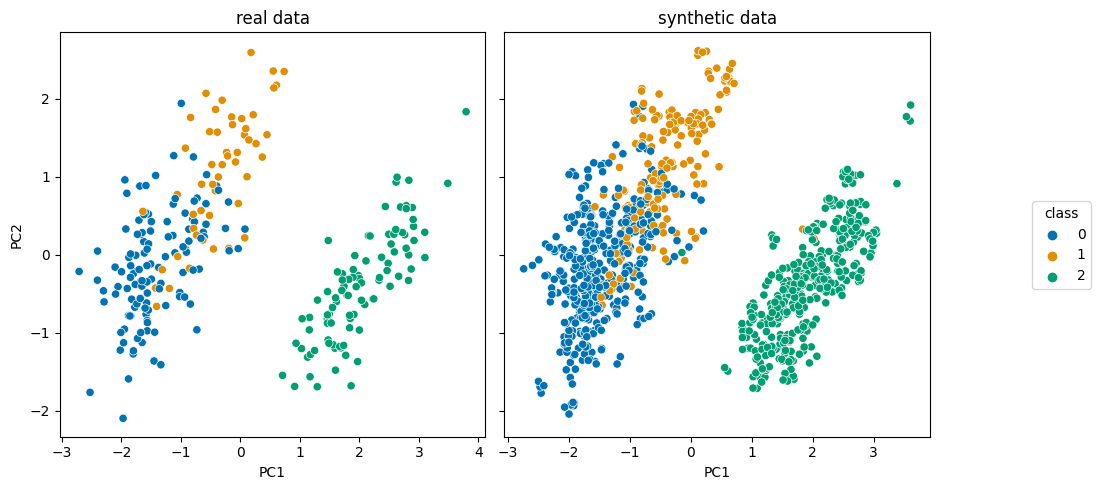

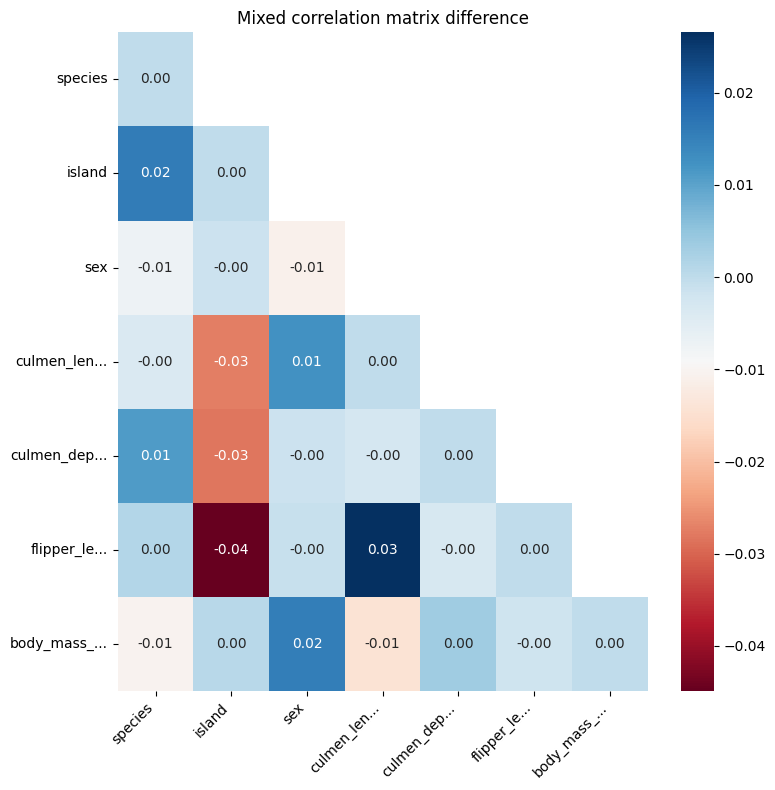

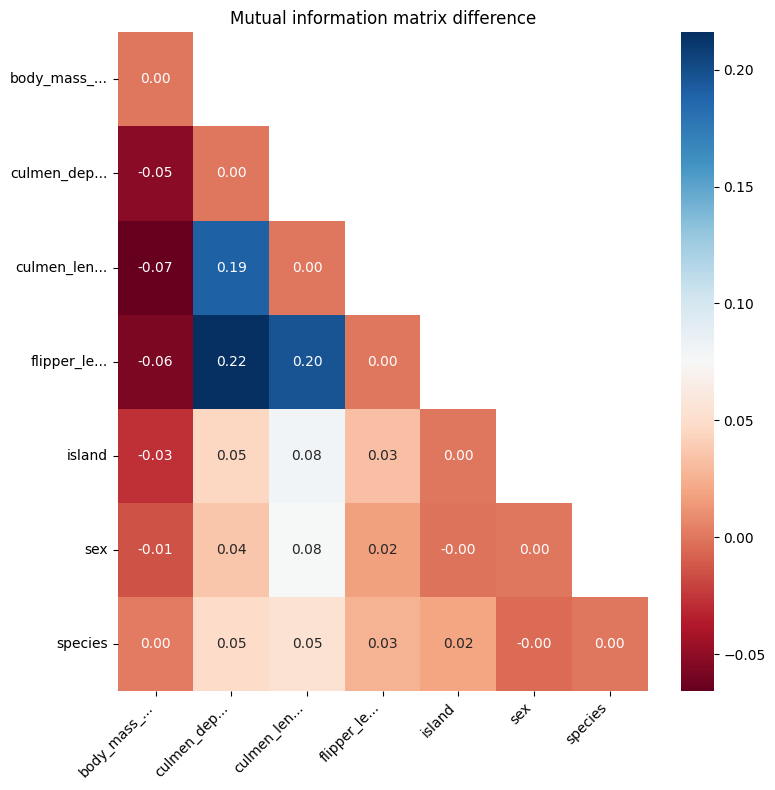

In [3]:
### First SynthEval object is created then run with the "full_eval" presets file.
S = SynthEval(df_real)
_ = S.evaluate(df_fake,target_column,"full_eval")   # The _ is for Jupyter purposes only, to avoid printing the results dictionary as well.

In the next example we try to show the full extend of the flexibility of SynthEval. The evaluator has both one of the preset files, as well as additional metrics supplied. Note that the "ks_test" is already part of the "fast_eval" preset file, but feeding as an additional keyword argument overrides the preset option configuration. To save custom configurations, for easy reproduceability, when keyword arguments are supplied, a SE_config.json file is saved. Instead of calling one of the presets, a filepath to a SE_config.json file can also be fed.

SynthEval: inferred categorical columns...
SynthEval: synthetic data read successfully

SynthEval results

Utility metric description                    value   error                                 
+---------------------------------------------------------------+
| Average dimensionwise means diff. (nums) :   0.0059  0.0078   |
| Average confidence interval overlap      :   0.6825  0.0630   |
|   -> # non-overlapping COIs at 95%       :    0               |
|   -> fraction of non-overlapping CIs     :   0.0000           |
| Kolmogorov–Smirnov test                                       |
|   -> avg. Kolmogorov–Smirnov distance    :   0.0313  0.0033   |
|   -> avg. Kolmogorov–Smirnov p-value     :   0.9411  0.0335   |
|   -> # significant tests at a=0.05       :    0               |
|   -> fraction of significant tests       :   0.0000           |
| Average empirical hellinger distance     :   0.2178  0.0786   |
| Nearest neighbour adversarial accuracy   :   0.3762  0.0038   |
+-------

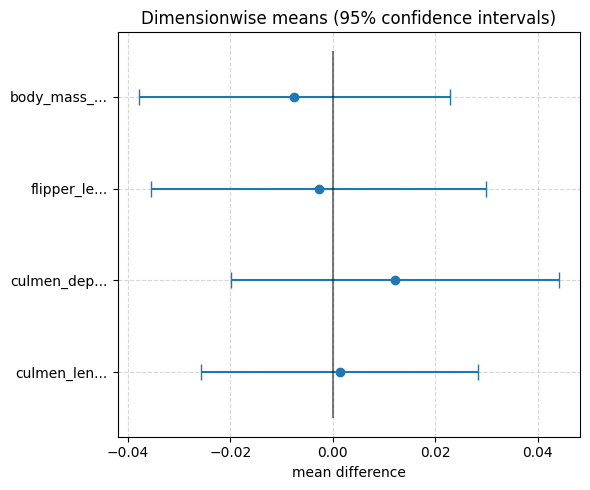

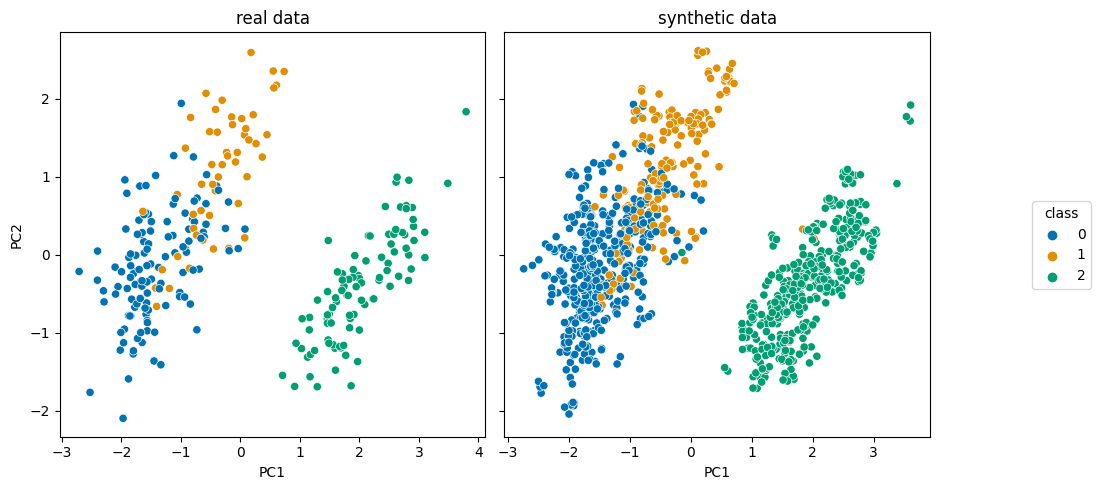

In [4]:
S = SynthEval(df_real,hold_out=df_test,nn_distance='euclid',unique_threshold=5)
_ = S.evaluate(df_fake,target_column,presets_file="fast_eval",ks_test={"do_permutation": False})